In [18]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [ ]:
import pandas as pd

df = pd.read_csv('data/raw.csv')
df.head()

making 2 new columns in the dataset
ph category--> Neutral: 0,
            Moderately Alkaline: 1 ;
fertility status --> 2 = Fertile,  0 = Can Be Improved,
     1 = Non-Fertile


In [7]:
import pandas as pd
file_path = 'data/raw.csv'
df = pd.read_csv(file_path)
df.fillna(df.mean(numeric_only=True), inplace=True)

df['pH Category'] = df['pH Level'].apply(lambda x: 1 if x > 7.5 else 0)

def classify_fertility(row):
    issues = 0
    if row['pH Level'] < 6.5 or row['pH Level'] > 7.5:
        issues += 1
    if row['Organic Matter (%)'] < 2:
        issues += 1
    if row['Nitrogen Content (kg/ha)'] < 25:
        issues += 1
    if row['Phosphorus Content (kg/ha)'] < 15:
        issues += 1
    if row['Potassium Content (kg/ha)'] < 35:
        issues += 1

    if issues == 0:
        return 2  # Fertile
    elif issues <= 2:
        return 0  # Can Be Improved
    else:
        return 1  # Non-Fertile

df['Fertility Status'] = df.apply(classify_fertility, axis=1).astype(int)

df.to_csv('cleaned_soil_analysis_data.csv', index=False)

df.head()


,District,Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),pH Category,Fertility Status
0,Jaipur,Chalky (Calcareous),6.546096,1.569807,27.931972,29.438438,42.782766,0,0
1,Bhilwara,Nitrogenous,6.832259,2.243018,22.263480,25.413455,37.644377,0,0
2,Jodhpur,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,0,0
3,Jaipur,Clay,8.019189,1.240327,15.839222,17.744206,42.758704,1,1
4,Jaipur,Sandy,8.100131,1.768419,27.942867,25.769504,30.651292,1,1


In [ ]:
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Full width
pd.set_option('display.colheader_justify', 'center')

# Display full DataFrame
display(df)

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [9]:
df.to_csv('cleaned_soil_analysis_data(1).csv', index=False)

looking for the missing values


In [10]:
import pandas as pd

df = pd.read_csv('cleaned_soil_analysis_data(1).csv')

print("Missing Values:\n", df.isnull().sum())

df.fillna(df.mean(numeric_only=True), inplace=True)

df.drop_duplicates(inplace=True)

df['District'] = df['District'].astype('category')
df['Soil Type'] = df['Soil Type'].astype('category')


Missing Values:
 District                      0
Soil Type                     0
pH Level                      0
Organic Matter (%)            0
Nitrogen Content (kg/ha)      0
Phosphorus Content (kg/ha)    0
Potassium Content (kg/ha)     0
pH Category                   0
Fertility Status              0
dtype: int64


Distribution of fertility

pH vs Organic Matter

Fertility vs Nutrient Levels

Soil Type & District stats

In [11]:
# Basic description
print(df.describe())


        pH Level    Organic Matter (%)  Nitrogen Content (kg/ha)  \
count  1000.000000      1000.000000            1000.000000         
mean      7.495453         1.993592              29.883358         
std       0.517155         0.515340               5.202697         
min       5.889492         0.155817              11.994574         
25%       7.157881         1.638911              26.217325         
50%       7.500129         1.981462              29.822797         
75%       7.846940         2.345688              33.232056         
max       9.038430         3.764528              45.760284         

       Phosphorus Content (kg/ha)  Potassium Content (kg/ha)  pH Category  \
count          1000.000000                1000.000000         1000.00000    
mean             19.729932                  39.877907            0.50000    
std               5.067005                   4.874751            0.50025    
min               4.961838                  24.116481            0.00000    
25

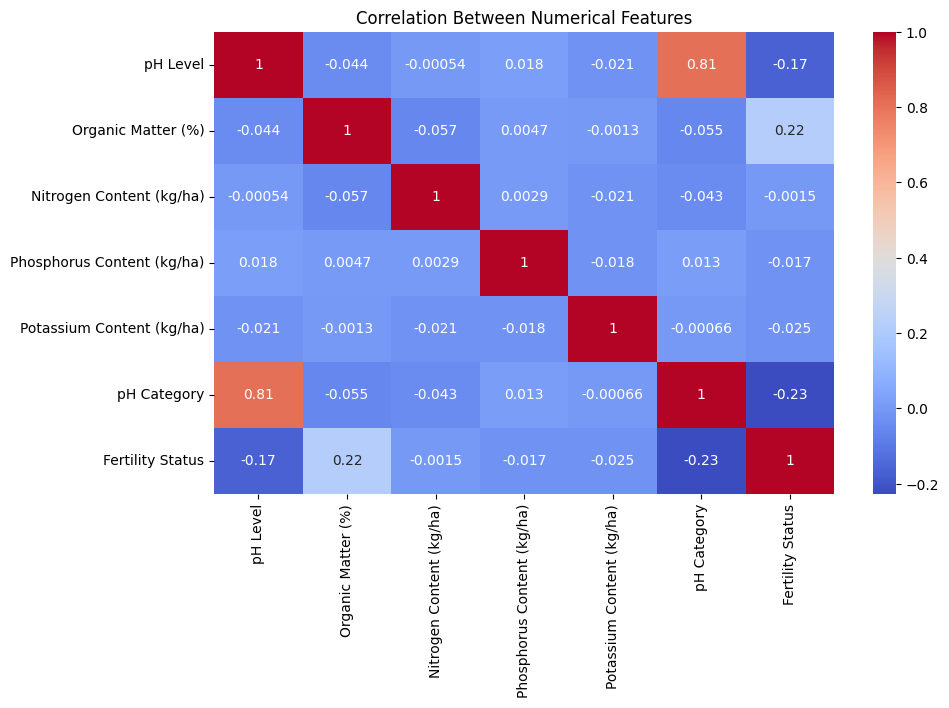

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()


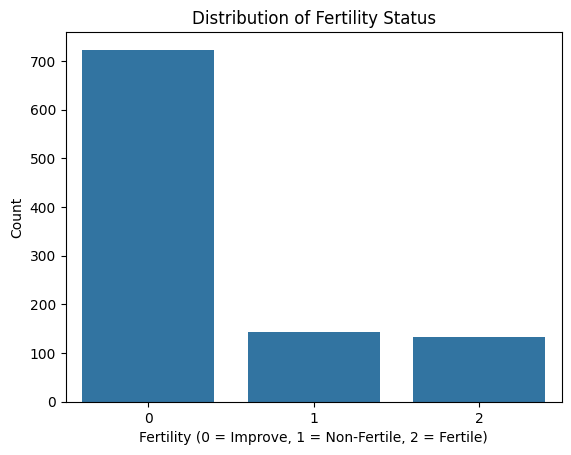

In [ ]:
sns.countplot(x='Fertility Status', data=df)
plt.title("Distribution of Fertility Status")
plt.xlabel("Fertility (0 = Improve, 1 = Non-Fertile, 2 = Fertile)")
plt.ylabel("Count")
plt.show()


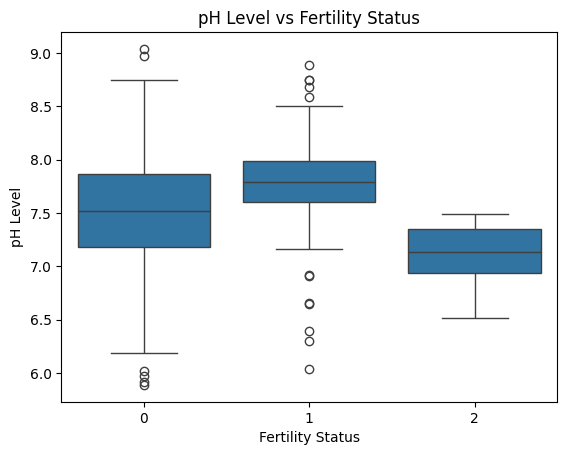

In [ ]:
sns.boxplot(x='Fertility Status', y='pH Level', data=df)
plt.title("pH Level vs Fertility Status")
plt.show()


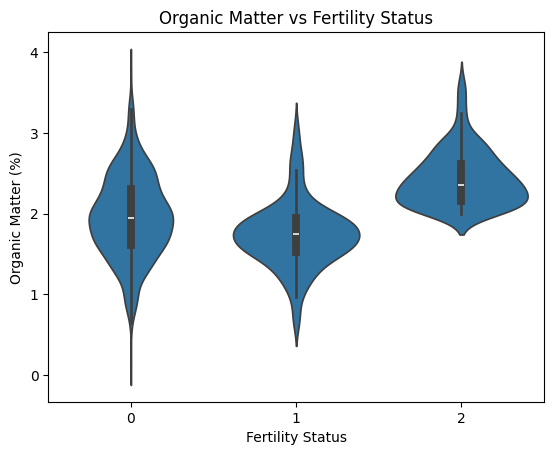

In [ ]:
sns.violinplot(x='Fertility Status', y='Organic Matter (%)', data=df)
plt.title("Organic Matter vs Fertility Status")
plt.show()


In [ ]:
! pip install catboost
! pip install catboost xgboost scikit-learn

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier

# Load dataset
df = pd.read_csv('cleaned_soil_analysis_data.csv')

# Show column names to double-check
print("Columns in dataset:", df.columns)

# Define feature columns (X) and target column (y)
X = df[['pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
        'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']]

# Guessing 'Crop Type' is the target (change this if needed)
y = df['pH Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Columns in dataset: Index(['District', 'Soil Type', 'pH Level', 'Organic Matter (%)',
       'Nitrogen Content (kg/ha)', 'Phosphorus Content (kg/ha)',
       'Potassium Content (kg/ha)', 'pH Category', 'Fertility Status'],
      dtype='object')
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load your dataset
df = pd.read_csv('cleaned_soil_analysis_data.csv')

# Define features and target (you can change these as per your dataset)
X = df[['pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
        'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']]

y = df['pH Category']  # Replace with another numeric target if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Store results
model_list = []
r2_list = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(f"🔹 {name}")
    model_list.append(name)

    print("Training performance:")
    print(f" - RMSE: {train_rmse:.4f}")
    print(f" - MAE: {train_mae:.4f}")
    print(f" - R²: {train_r2:.4f}")
    print("Test performance:")
    print(f" - RMSE: {test_rmse:.4f}")
    print(f" - MAE: {test_mae:.4f}")
    print(f" - R²: {test_r2:.4f}")

    r2_list.append(test_r2)
    print("="*40, '\n')


🔹 Linear Regression
Training performance:
 - RMSE: 0.2947
 - MAE: 0.2552
 - R²: 0.6526
Test performance:
 - RMSE: 0.2967
 - MAE: 0.2595
 - R²: 0.6478

🔹 Lasso
Training performance:
 - RMSE: 0.5000
 - MAE: 0.5000
 - R²: 0.0000
Test performance:
 - RMSE: 0.5000
 - MAE: 0.5000
 - R²: -0.0002

🔹 Ridge
Training performance:
 - RMSE: 0.2947
 - MAE: 0.2553
 - R²: 0.6526
Test performance:
 - RMSE: 0.2967
 - MAE: 0.2596
 - R²: 0.6479

🔹 K-Neighbors Regressor
Training performance:
 - RMSE: 0.4092
 - MAE: 0.3633
 - R²: 0.3302
Test performance:
 - RMSE: 0.4848
 - MAE: 0.4350
 - R²: 0.0599

🔹 Decision Tree
Training performance:
 - RMSE: 0.0000
 - MAE: 0.0000
 - R²: 1.0000
Test performance:
 - RMSE: 0.0000
 - MAE: 0.0000
 - R²: 1.0000

🔹 Random Forest Regressor
Training performance:
 - RMSE: 0.0096
 - MAE: 0.0005
 - R²: 0.9996
Test performance:
 - RMSE: 0.0000
 - MAE: 0.0000
 - R²: 1.0000

🔹 XGBoost Regressor
Training performance:
 - RMSE: 0.0002
 - MAE: 0.0000
 - R²: 1.0000
Test performance:
 - RMS

In [5]:
df = pd.read_csv('cleaned_soil_analysis_data.csv')

# Define features and target (you can change these as per your dataset)
X = df[['pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
        'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']]

y = df['Fertility Status']  # Replace with another numeric target if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Store results
model_list = []
r2_list = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(f"🔹 {name}")
    model_list.append(name)

    print("Training performance:")
    print(f" - RMSE: {train_rmse:.4f}")
    print(f" - MAE: {train_mae:.4f}")
    print(f" - R²: {train_r2:.4f}")
    print("Test performance:")
    print(f" - RMSE: {test_rmse:.4f}")
    print(f" - MAE: {test_mae:.4f}")
    print(f" - R²: {test_r2:.4f}")

    r2_list.append(test_r2)
    print("="*40, '\n')


🔹 Linear Regression
Training performance:
 - RMSE: 0.6911
 - MAE: 0.5824
 - R²: 0.0675
Test performance:
 - RMSE: 0.6686
 - MAE: 0.5743
 - R²: 0.0896

🔹 Lasso
Training performance:
 - RMSE: 0.7156
 - MAE: 0.5953
 - R²: 0.0000
Test performance:
 - RMSE: 0.7007
 - MAE: 0.5859
 - R²: -0.0001

🔹 Ridge
Training performance:
 - RMSE: 0.6911
 - MAE: 0.5824
 - R²: 0.0675
Test performance:
 - RMSE: 0.6686
 - MAE: 0.5744
 - R²: 0.0895

🔹 K-Neighbors Regressor
Training performance:
 - RMSE: 0.6118
 - MAE: 0.4550
 - R²: 0.2691
Test performance:
 - RMSE: 0.6870
 - MAE: 0.5220
 - R²: 0.0386

🔹 Decision Tree
Training performance:
 - RMSE: 0.0000
 - MAE: 0.0000
 - R²: 1.0000
Test performance:
 - RMSE: 0.1414
 - MAE: 0.0200
 - R²: 0.9593

🔹 Random Forest Regressor
Training performance:
 - RMSE: 0.0860
 - MAE: 0.0320
 - R²: 0.9856
Test performance:
 - RMSE: 0.1929
 - MAE: 0.0785
 - R²: 0.9242

🔹 XGBoost Regressor
Training performance:
 - RMSE: 0.0011
 - MAE: 0.0007
 - R²: 1.0000
Test performance:
 - RMS

In [6]:
X = df[['pH Level', 'Organic Matter (%)', 'Nitrogen Content (kg/ha)',
        'Phosphorus Content (kg/ha)', 'Potassium Content (kg/ha)']]

y = df[['Fertility Status', 'pH Category']]  # These are your targets


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
model_list = []
r2_list_fertility = []
r2_list_ph = []

for name, model in models.items():
    # Train and predict for Fertility Status
    model.fit(X_train, y_train['Fertility Status'])
    y_pred_fertility = model.predict(X_test)

    # Train and predict for pH Category
    model.fit(X_train, y_train['pH Category'])
    y_pred_ph = model.predict(X_test)

    # Evaluate both targets
    _, _, r2_fertility = evaluate_model(y_test['Fertility Status'], y_pred_fertility)
    _, _, r2_ph = evaluate_model(y_test['pH Category'], y_pred_ph)

    model_list.append(name)
    r2_list_fertility.append(r2_fertility)
    r2_list_ph.append(r2_ph)

    print(f"🔹 {name}")
    print(f"R² Score for Fertility Status: {r2_fertility:.4f}")
    print(f"R² Score for pH Category: {r2_ph:.4f}")
    print("="*40)


🔹 Linear Regression
R² Score for Fertility Status: 0.0896
R² Score for pH Category: 0.6478
🔹 Lasso
R² Score for Fertility Status: -0.0001
R² Score for pH Category: -0.0002
🔹 Ridge
R² Score for Fertility Status: 0.0895
R² Score for pH Category: 0.6479
🔹 K-Neighbors Regressor
R² Score for Fertility Status: 0.0386
R² Score for pH Category: 0.0599
🔹 Decision Tree
R² Score for Fertility Status: 0.9491
R² Score for pH Category: 1.0000
🔹 Random Forest Regressor
R² Score for Fertility Status: 0.9263
R² Score for pH Category: 1.0000
🔹 XGBoost Regressor
R² Score for Fertility Status: 0.9401
R² Score for pH Category: 1.0000
🔹 CatBoost Regressor
R² Score for Fertility Status: 0.9591
R² Score for pH Category: 0.9997
🔹 AdaBoost Regressor
R² Score for Fertility Status: 0.5500
R² Score for pH Category: 1.0000


In [9]:
results_df = pd.DataFrame({
    'Model': model_list,
    'R² (Fertility Status)': r2_list_fertility,
    'R² (pH Category)': r2_list_ph
}).sort_values(by='R² (Fertility Status)', ascending=False)

print(results_df)


                     Model  R² (Fertility Status)  R² (pH Category)
7       CatBoost Regressor               0.959070          0.999733
4            Decision Tree               0.949081          1.000000
6        XGBoost Regressor               0.940084          1.000000
5  Random Forest Regressor               0.926292          1.000000
8       AdaBoost Regressor               0.550026          1.000000
0        Linear Regression               0.089609          0.647832
2                    Ridge               0.089455          0.647945
3    K-Neighbors Regressor               0.038648          0.059906
1                    Lasso              -0.000080         -0.000156
